# Linear Regression

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [51]:
data = fetch_california_housing()

In [52]:
X = data['data']
y = data['target']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [54]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

In [55]:
input_dim = X_train.shape[1]
output_dim = 1
model = LinearRegression(input_dim, output_dim)

In [56]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [57]:
train_losses = []
val_losses = []

In [58]:
num_epochs = 1000
for epoch in range(num_epochs):
    
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss = loss.item()
    train_losses.append(train_loss)

    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        loss = criterion(outputs, y_test.view(-1, 1))

    val_loss = loss.item()
    val_losses.append(val_loss)

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

Epoch [100/1000], Train Loss: 1.7655, Val Loss: 1.7519
Epoch [200/1000], Train Loss: 0.7584, Val Loss: 0.7738
Epoch [300/1000], Train Loss: 0.5479, Val Loss: 0.5787
Epoch [400/1000], Train Loss: 0.5203, Val Loss: 0.5561
Epoch [500/1000], Train Loss: 0.5180, Val Loss: 0.5554
Epoch [600/1000], Train Loss: 0.5179, Val Loss: 0.5558
Epoch [700/1000], Train Loss: 0.5179, Val Loss: 0.5559
Epoch [800/1000], Train Loss: 0.5179, Val Loss: 0.5559
Epoch [900/1000], Train Loss: 0.5179, Val Loss: 0.5559
Epoch [1000/1000], Train Loss: 0.5179, Val Loss: 0.5559


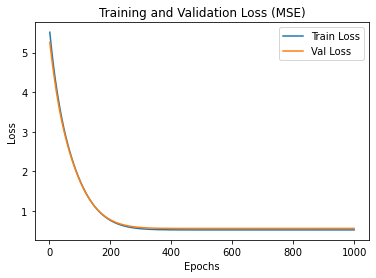

In [59]:
import matplotlib.pyplot as plt
import numpy as np
epochs = range(1, num_epochs+1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (MSE)')
plt.legend()
plt.show()